# Breast Cancer classification using Logistic Regression and KNeighbors Classification.

* Load Libraries.

In [313]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [314]:
sns.set_style('darkgrid')
sns.set_palette('viridis')

* Load dataset.

In [315]:
cancer_df = pd.read_csv('cancer.csv')

In [316]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


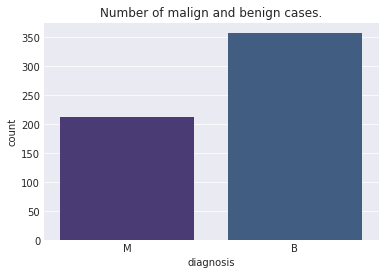

In [357]:
sns.countplot(cancer_df['diagnosis'],data=cancer_df)
plt.title('Number of malign and benign cases.')
plt.show()

In [318]:
def m_b(text):
    if text == 'M':
        return 1
    else:
        return 0

In [319]:
cancer_df = cancer_df.drop(cancer_df.columns[-1], axis=1)

In [320]:
cancer_df['M'] = cancer_df.diagnosis.apply(m_b)

In [321]:
X = cancer_df[cancer_df.columns[2:-1]]
y = cancer_df['M']

# Logistic Regression.

In [322]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [324]:
logmodel = LogisticRegression()

In [325]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [326]:
pred = logmodel.predict(X_test)

In [327]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[102   3]
 [  5  61]]


             precision    recall  f1-score   support

          0       0.95      0.97      0.96       105
          1       0.95      0.92      0.94        66

avg / total       0.95      0.95      0.95       171



# KNeighbors Classification.

In [328]:
scaler = StandardScaler()

In [329]:
features = scaler.fit_transform(cancer_df[cancer_df.columns[2:-1]])

In [330]:
cancer_feats = pd.DataFrame(data=features, columns=cancer_df.columns[2:-1])

In [331]:
X = cancer_feats
y = cancer_df['diagnosis']

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [333]:
knn = KNeighborsClassifier(n_neighbors=1)

In [334]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [335]:
pred = knn.predict(X_test)

In [336]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test,pred))

Confusion Matrix:
[[98  2]
 [ 4 67]]


Classification Report:
             precision    recall  f1-score   support

          B       0.96      0.98      0.97       100
          M       0.97      0.94      0.96        71

avg / total       0.97      0.96      0.96       171



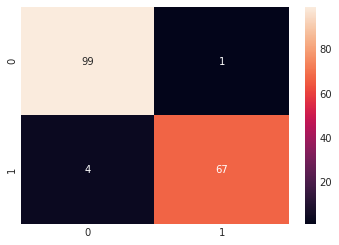

In [343]:
sns.heatmap(confusion_matrix(y_test,pred), annot=True)

In [337]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

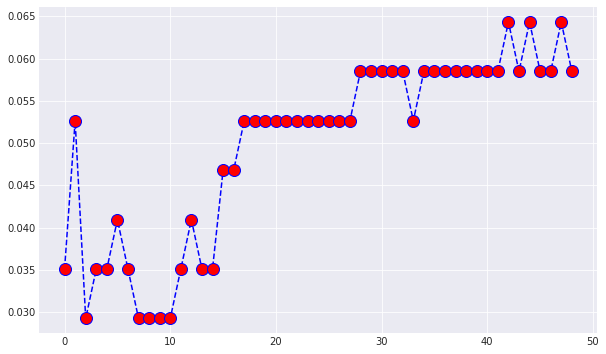

In [340]:
fig = plt.figure(figsize=(10,6))

plt.plot(error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=12)

plt.show()

In [339]:
knn = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate))+1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K =',error_rate.index(min(error_rate)))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test,pred))

WITH K = 2


Confusion Matrix:
[[99  1]
 [ 4 67]]


Classification Report:
             precision    recall  f1-score   support

          B       0.96      0.99      0.98       100
          M       0.99      0.94      0.96        71

avg / total       0.97      0.97      0.97       171

